# Task 3: Non-Linear Curve Fitting

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

### Abstract

This task explores non-linear curve fitting techniques to model complex, non-linear relationships within laboratory-measured and task-specific datasets. Using python's scipy.optimize library, we fit multiple rheological models to laboratory viscosity, including Power Law, Herschel-Bulkley and Robertson-Stiff models, capturing the the behavior of fluid dynamics under different shear rates. Each model being evaluated on its $\R^2$ score, providing a quantative measure of model accuracy. Applying similar non-linear optimization techniques to the task data, focusing on mapping relationships between geographysical properties such as density(DEN), shear wave velocity(Vs), and neutron porosity(NEU) with the compressional wave velocity (Vp). Optimized curve-fitting parameters provide insight into feature's contribution to Vp, while performance metrics and visualizations reveal the comparative effectiveness on the different models.

### Introduction

Rheology, the study of fluid flow and deformation, plays a critical role iin understanding how materials behave under different stress and flow conditions. Rheology properties, like viscosity, are essential for determining fluid dynamics in applications such as the petroleum industry, where they impact the performance of drilling fluids and cement. This task focuses on modeling laboratory-measured viscometer data to characterize these properties. Using the three rheological models, Power Law, Herschel-Bulkley, and Robertson-Stiff, this task will optimize parameters for each model to best fit the dataset, display each fit with scatter plots, and evaluate their accuracy with $\R^2$ values. by comparing, this analysis aims to find the most accurate approach for predicting fluid behaviors. 

### Laboratory-measured viscosity data

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  

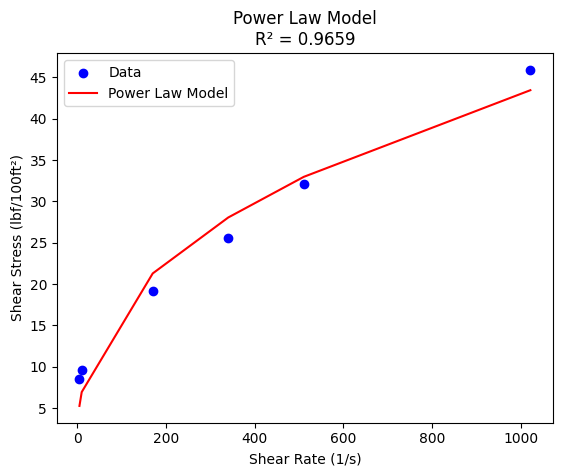

Power Law Model Parameters: [2.75356261 0.39811263]
Power Law Model R²: 0.9658861828739901




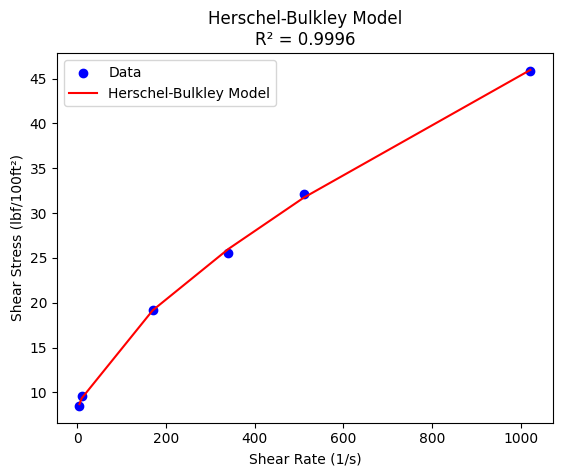

Herschel-Bulkley Model Parameters: [0.3712281  0.66935514 7.59810823]
Herschel-Bulkley Model R²: 0.9996064451715285




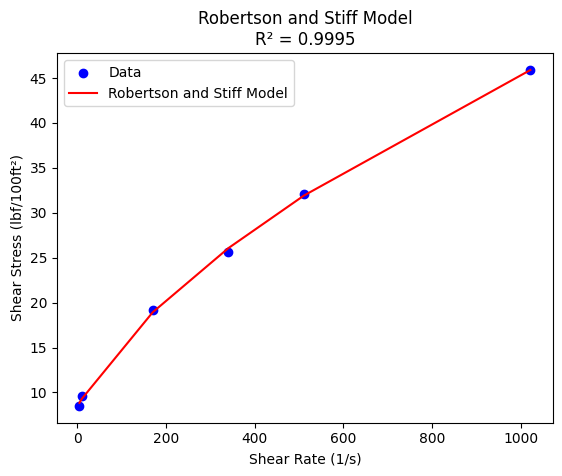

Robertson and Stiff Model Parameters: [ 0.90003157 52.67489453  0.56329938]
Robertson and Stiff Model R²: 0.9994670494050243




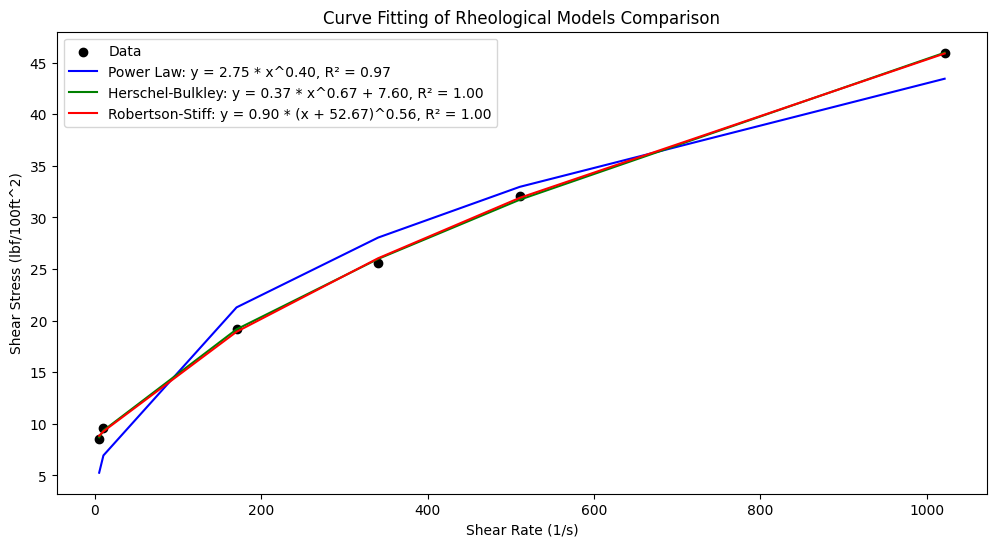

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

shear_rate = np.array([5.1, 10.2, 170.3, 340.6, 510.9, 1021.8])
shear_stress = np.array([8.5, 9.6, 19.2, 25.6, 32.1, 45.9]) 

def power_law(x, a, b):
    return a * x**b

def herschel_bulkley(x, a, b, c):
    return a * x**b + c

def robertson_stiff(x, a, b, c):
    return a * (x + b)**c

def fit_and_plot(model_func, x, y, initial_params, title):
    popt, _ = curve_fit(model_func, x, y, p0=initial_params)
    
    y_model = model_func(x, *popt)
    
    r2 = r2_score(y, y_model)
    
    plt.figure()
    plt.scatter(x, y, label="Data", color="blue")
    plt.plot(x, y_model, label=f"{title} Model", color="red")
    plt.title(f"{title} Model\nR² = {r2:.4f}")
    plt.xlabel("Shear Rate (1/s)")
    plt.ylabel("Shear Stress (lbf/100ft²)")
    plt.legend()
    plt.show()
    
    print(f"{title} Model Parameters:", popt)
    print(f"{title} Model R²:", r2)
    print("\n")

fit_and_plot(power_law, shear_rate, shear_stress, [1, 1], "Power Law")
fit_and_plot(herschel_bulkley, shear_rate, shear_stress, [1, 1, 1], "Herschel-Bulkley")
fit_and_plot(robertson_stiff, shear_rate, shear_stress, [1, 1, 1], "Robertson and Stiff")

popt_power, _ = curve_fit(power_law, shear_rate, shear_stress)
a_power, b_power = popt_power
shear_stress_power = power_law(shear_rate, *popt_power)
r2_power = r2_score(shear_stress, shear_stress_power)

popt_hb, _ = curve_fit(herschel_bulkley, shear_rate, shear_stress)
a_hb, b_hb, c_hb = popt_hb
shear_stress_hb = herschel_bulkley(shear_rate, *popt_hb)
r2_hb = r2_score(shear_stress, shear_stress_hb)

popt_rs, _ = curve_fit(robertson_stiff, shear_rate, shear_stress)
a_rs, b_rs, c_rs = popt_rs
shear_stress_rs = robertson_stiff(shear_rate, *popt_rs)
r2_rs = r2_score(shear_stress, shear_stress_rs)

plt.figure(figsize=(12, 6))
plt.scatter(shear_rate, shear_stress, color='black', label='Data')
plt.plot(shear_rate, shear_stress_power, label=f'Power Law: y = {a_power:.2f} * x^{b_power:.2f}, R² = {r2_power:.2f}', color='blue')
plt.plot(shear_rate, shear_stress_hb, label=f'Herschel-Bulkley: y = {a_hb:.2f} * x^{b_hb:.2f} + {c_hb:.2f}, R² = {r2_hb:.2f}', color='green')
plt.plot(shear_rate, shear_stress_rs, label=f'Robertson-Stiff: y = {a_rs:.2f} * (x + {b_rs:.2f})^{c_rs:.2f}, R² = {r2_rs:.2f}', color='red')
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Shear Stress (lbf/100ft^2)')
plt.legend()
plt.title('Curve Fitting of Rheological Models Comparison')
plt.show()

#### 3.2

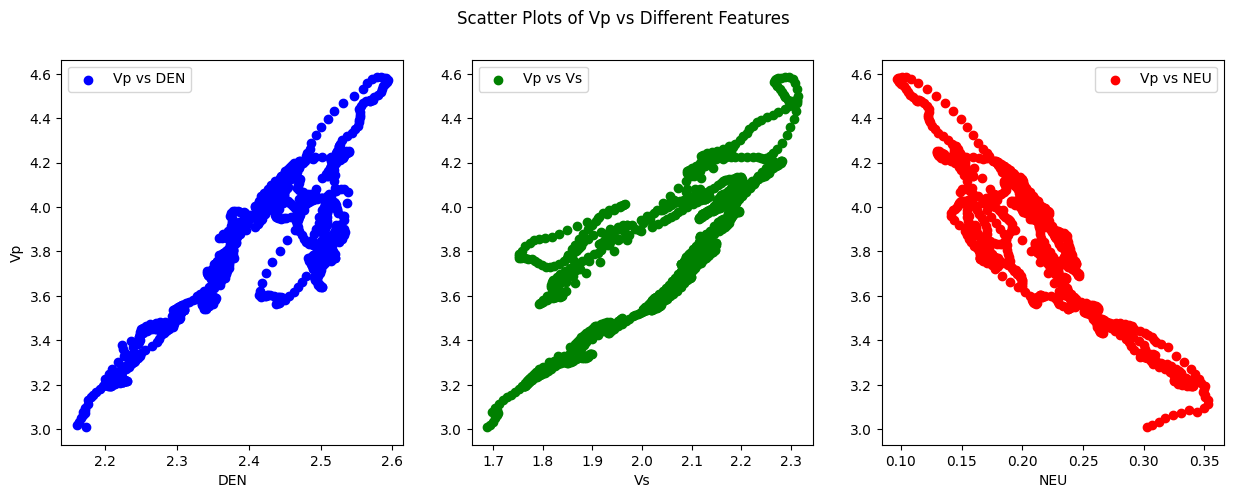

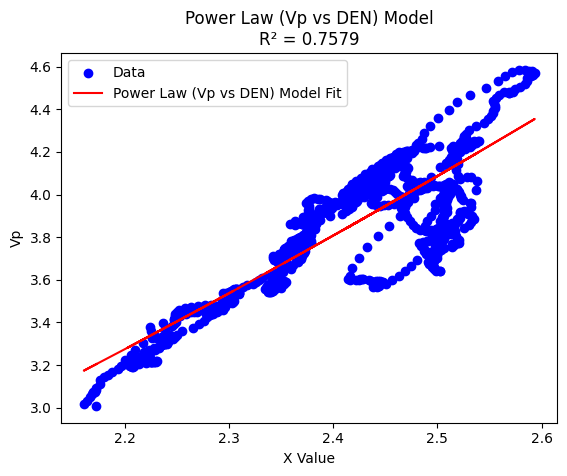

Power Law (Vp vs DEN) Model Parameters: [0.83632805 1.73130143]
Power Law (Vp vs DEN) Model R²: 0.7579363665252637




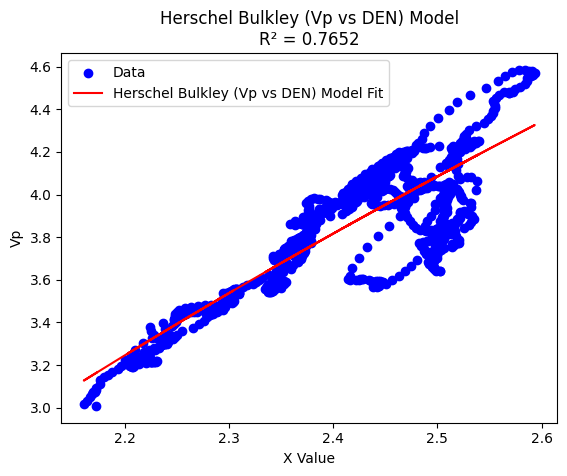

Herschel Bulkley (Vp vs DEN) Model Parameters: [ 3.59106740e+03  1.82434554e-03 -3.59299036e+03]
Herschel Bulkley (Vp vs DEN) Model R²: 0.7651836435288117




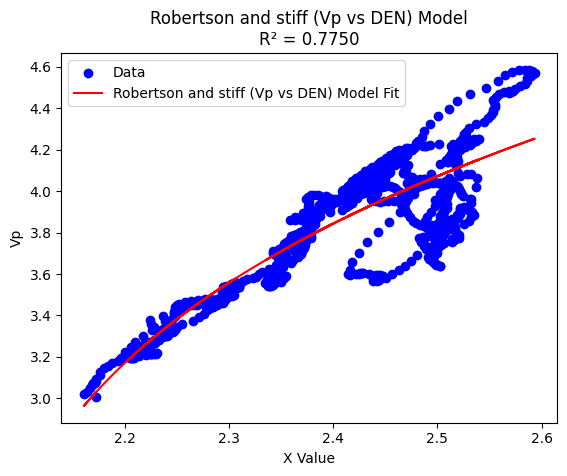

Robertson and stiff (Vp vs DEN) Model Parameters: [ 4.89057756 -2.04303315  0.23395863]
Robertson and stiff (Vp vs DEN) Model R²: 0.7750445373158625




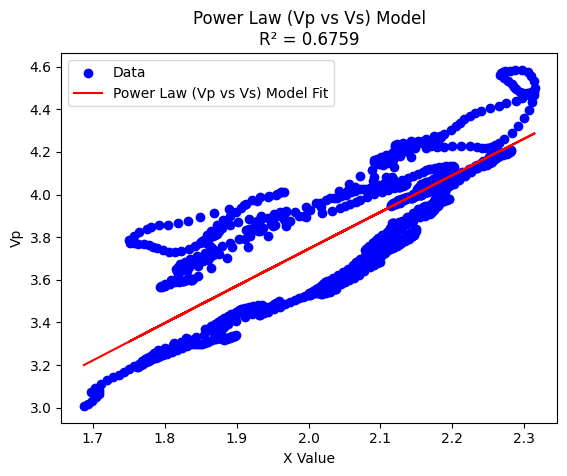

Power Law (Vp vs Vs) Model Parameters: [1.97264345 0.92483876]
Power Law (Vp vs Vs) Model R²: 0.6759028987176199




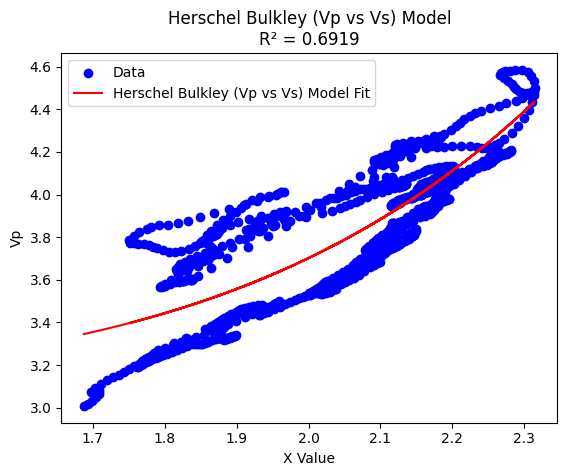

Herschel Bulkley (Vp vs Vs) Model Parameters: [0.01200413 5.59483039 3.12157269]
Herschel Bulkley (Vp vs Vs) Model R²: 0.6918536325537936




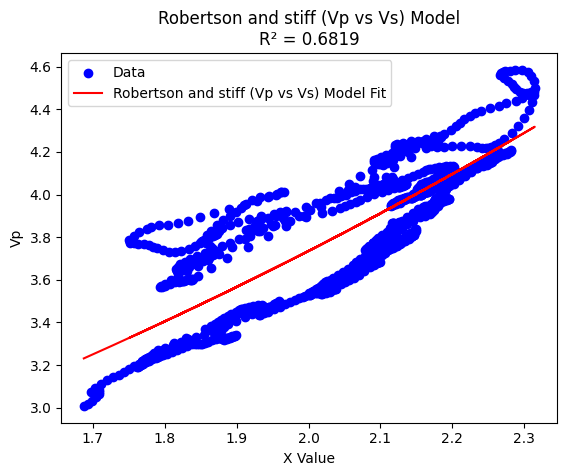

Robertson and stiff (Vp vs Vs) Model Parameters: [1.39305476e-41 5.02281751e+01 2.41156203e+01]
Robertson and stiff (Vp vs Vs) Model R²: 0.6819104253473722




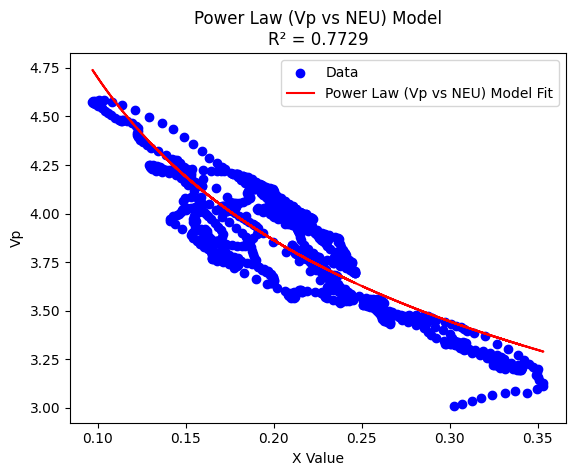

Power Law (Vp vs NEU) Model Parameters: [ 2.44943344 -0.28309466]
Power Law (Vp vs NEU) Model R²: 0.7728622862109473




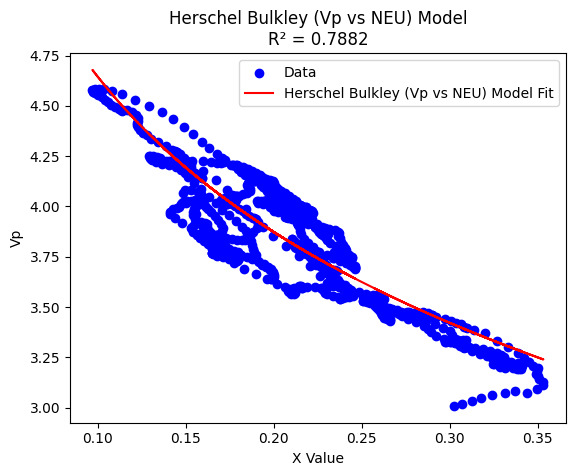

Herschel Bulkley (Vp vs NEU) Model Parameters: [ 6.49193635e+03 -1.71623007e-04 -6.48985627e+03]
Herschel Bulkley (Vp vs NEU) Model R²: 0.7881903644602732




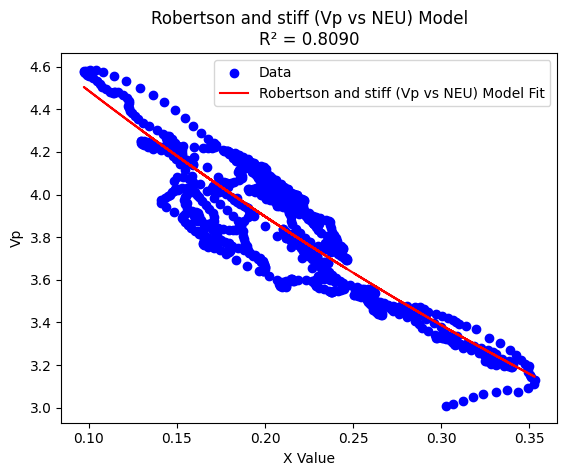

Robertson and stiff (Vp vs NEU) Model Parameters: [ 2.60751725e+37  1.99286326e+01 -2.82444210e+01]
Robertson and stiff (Vp vs NEU) Model R²: 0.8090022356218145




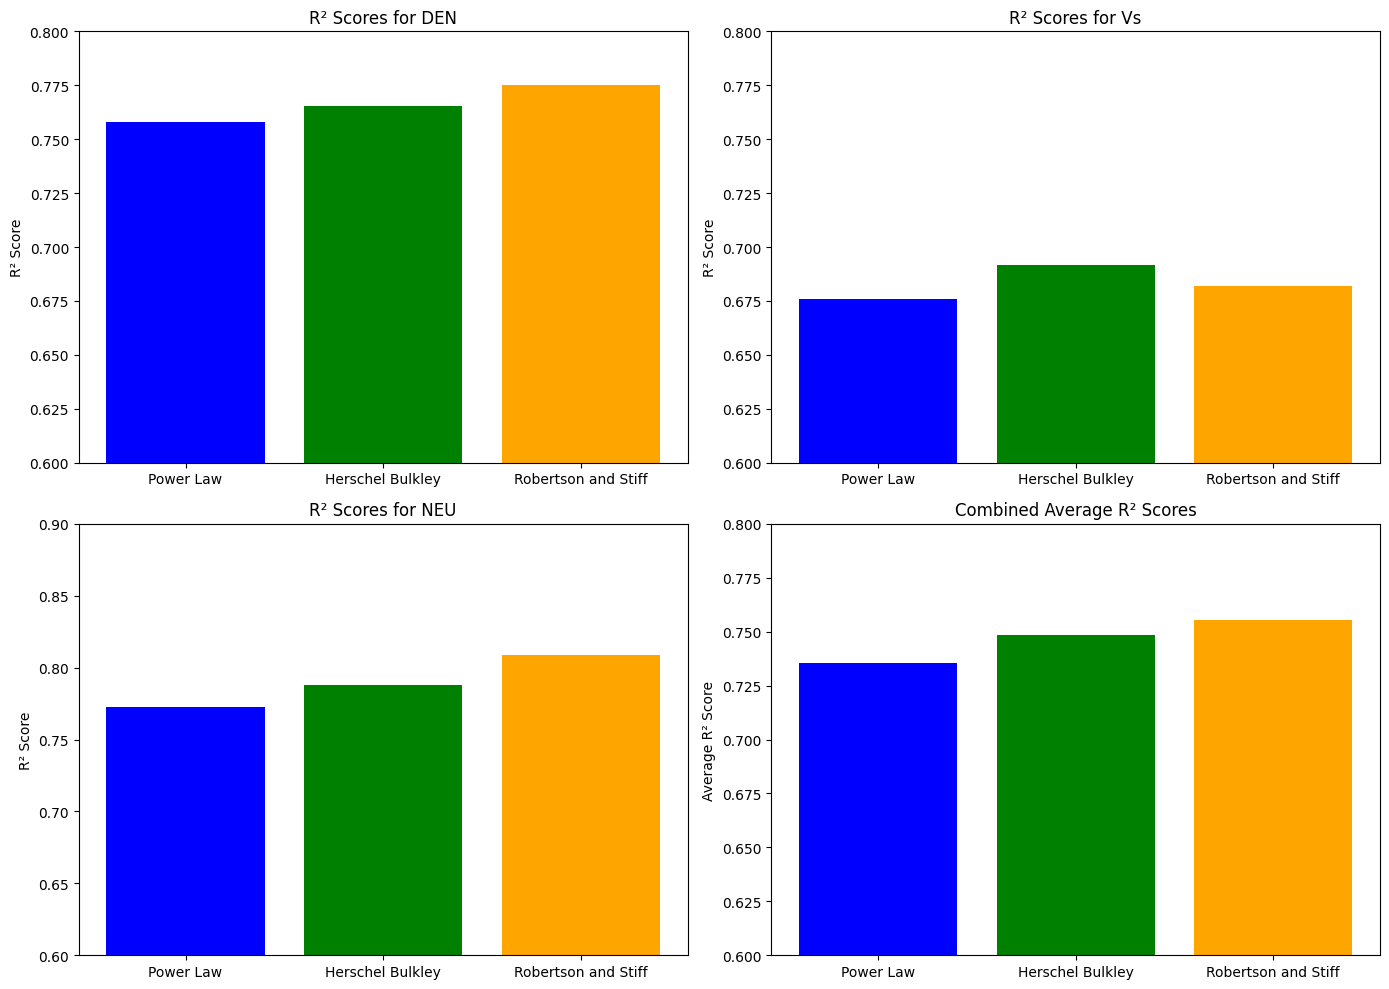

In [41]:
df = pd.read_excel('CleanedFeatureSelectedFiltered.xlsx')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

def fit_and_plot_mapping(x, y, model_func, initial_params, title):
    plt.scatter(x, y, label="Data", color="blue")
    try:
        popt, _ = curve_fit(model_func, x, y, p0=initial_params, maxfev=200000)
        y_model = model_func(x, *popt)
        
        r2 = r2_score(y, y_model)
        
        plt.plot(x, y_model, color="red", label=f"{title} Model Fit")
        plt.title(f"{title} Model\nR² = {r2:.4f}")
        plt.xlabel("X Value")
        plt.ylabel("Vp")
        plt.legend()
        plt.show()
        
        print(f"{title} Model Parameters:", popt)
        print(f"{title} Model R²:", r2)
        print("\n")
        return r2
    except RuntimeError as e:
        print(f"{title} Model: Optimal parameters not found. {str(e)}")
        return None

r2_scores = {
    "DEN": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": []},
    "Vs": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": []},
    "NEU": {"Power Law": [], "Herschel Bulkley": [], "Robertson and Stiff": []}
}

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['DEN'], df['Vp'], color='blue', label='Vp vs DEN')
plt.xlabel("DEN")
plt.ylabel("Vp")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df['Vs'], df['Vp'], color='green', label='Vp vs Vs')
plt.xlabel("Vs")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df['NEU'], df['Vp'], color='red', label='Vp vs NEU')
plt.xlabel("NEU")
plt.legend()

plt.suptitle("Scatter Plots of Vp vs Different Features")
plt.show()

r2_scores["DEN"]["Power Law"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs DEN)"))
r2_scores["DEN"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs DEN)"))
r2_scores["DEN"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['DEN'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs DEN)"))

r2_scores["Vs"]["Power Law"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs Vs)"))
r2_scores["Vs"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs Vs)"))
r2_scores["Vs"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['Vs'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs Vs)"))

r2_scores["NEU"]["Power Law"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], power_law, [1, 1], "Power Law (Vp vs NEU)"))
r2_scores["NEU"]["Herschel Bulkley"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], herschel_bulkley, [1, 0.1, 1], "Herschel Bulkley (Vp vs NEU)"))
r2_scores["NEU"]["Robertson and Stiff"].append(fit_and_plot_mapping(df['NEU'], df['Vp'], robertson_stiff, [1, 1, 1], "Robertson and stiff (Vp vs NEU)"))

combined_r2_scores = {
    model: np.nanmean([r2_scores[feature][model][0] for feature in r2_scores]) 
    for model in ["Power Law", "Herschel Bulkley", "Robertson and Stiff"]
}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(r2_scores["DEN"].keys(), [score[0] for score in r2_scores["DEN"].values()], color=['blue', 'green', 'orange'])
axs[0, 0].set_title("R² Scores for DEN")
axs[0, 0].set_ylabel("R² Score")
axs[0, 0].set_ylim(0.6, 0.8)

axs[0, 1].bar(r2_scores["Vs"].keys(), [score[0] for score in r2_scores["Vs"].values()], color=['blue', 'green', 'orange'])
axs[0, 1].set_title("R² Scores for Vs")
axs[0, 1].set_ylabel("R² Score")
axs[0, 1].set_ylim(0.6, 0.8)

axs[1, 0].bar(r2_scores["NEU"].keys(), [score[0] for score in r2_scores["NEU"].values()], color=['blue', 'green', 'orange'])
axs[1, 0].set_title("R² Scores for NEU")
axs[1, 0].set_ylabel("R² Score")
axs[1, 0].set_ylim(0.6, 0.9)

axs[1, 1].bar(combined_r2_scores.keys(), combined_r2_scores.values(), color=['blue', 'green', 'orange'])
axs[1, 1].set_title("Combined Average R² Scores")
axs[1, 1].set_ylabel("Average R² Score")
axs[1, 1].set_ylim(0.6, 0.8)

plt.tight_layout()
plt.show()

### Conclusion

### Reflection

### References